In [1]:
from defectlib import extract_bnfeatures_from_defect, train_svm_classifier, plot_tsne
import numpy as np

from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np

from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne
%matplotlib inline

Using TensorFlow backend.


Loading BokehJS ...

In [2]:
defect_dict = load_tensors_all('./ben1214/CL0401/', width=128)
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

(26, 118, 133)
(60, 118, 131)
(207, 118, 131)
(29, 122, 125)
(36, 122, 125)
(39, 122, 125)
(19, 390, 381)
(17, 390, 381)
(15, 390, 381)
the final tensor should be 448
number of class 0: 260
	number of SN: 11
number of class 1: 79
	number of SN: 20
number of class 4: 55
	number of SN: 20
number of class 7: 54
	number of SN: 19


In [3]:
tensors_flattened = tensors.reshape((448, 128*128))

In [4]:
plot_tsne?

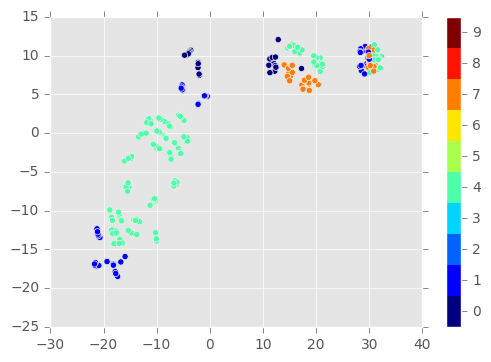

In [5]:
plot_tsne(tensors_flattened, labels, sns, perplexity=50, interactive=False)

In [6]:
features_all, labels_all, sns_all, images_all = extract_bnfeatures_from_defect('./ben1214/CL0401/', comb=True)

there are 26 images inside CL0401_2A_c0
Processing ./ben1214/CL0401/2A/CL0401_2A_c0/CL0401_Recombination_0_2A_0.jpg...
there are 60 images inside CL0401_2A_c1
Processing ./ben1214/CL0401/2A/CL0401_2A_c1/CL0401_Recombination_F3Y64830U17GY4TA_2A_0.jpg...
there are 207 images inside CL0401_2A_c4
Processing ./ben1214/CL0401/2A/CL0401_2A_c4/CL0401_Recombination_F3Y6452037UGY4TA_2A_0.jpg...
Processing ./ben1214/CL0401/2A/CL0401_2A_c4/CL0401_Recombination_F3Y65013JQKGY4TA_2A_5.jpg...
Processing ./ben1214/CL0401/2A/CL0401_2A_c4/CL0401_Recombination_F3Y65050P7DGY4RB_2A_3.jpg...
there are 29 images inside CL0401_6A_c0
Processing ./ben1214/CL0401/6A/CL0401_6A_c0/CL0401_Recombination_0_6A_0.jpg...
there are 36 images inside CL0401_6A_c4
Processing ./ben1214/CL0401/6A/CL0401_6A_c4/CL0401_Recombination_F3Y6452037UGY4TA_6A_0.jpg...
there are 39 images inside CL0401_6A_c7
Processing ./ben1214/CL0401/6A/CL0401_6A_c7/CL0401_Recombination_F3Y649617UMH3RPA_6A_0.jpg...
there are 19 images inside CL0401_8A_

In [7]:
features_all.shape

(448, 2048)

In [8]:
plot_tsne(features_all, labels_all, sns_all, perplexity=50, interactive=True, images=images_all)

In [9]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.991150, total=   0.3s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.946903, total=   0.3s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.990909, total=   0.3s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.991150, total=   0.3s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.946903, total=   0.2s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.990909, total=   0.3s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.991150, total=   0.3s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.946903, total=   0.2s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.990909, total=   0.3s
[CV] kernel=linear, C=1000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   23.8s finished


Cannot save trained svm model to model.model

Best parameters set:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix:
Labels: 0,1,4,7

[[11  0  0  0]
 [ 0 14  0  0]
 [ 0  0 72  0]
 [ 0  0  0 15]]

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        14
          4       1.00      1.00      1.00        72
          7       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00       112



GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [10]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [21]:
vis_data = bh_sne(features, perplexity=50)
vis_x = vis_data[:,0]
vis_y = vis_data[:,1]

vis_data_0 = vis_data[labels=='0']
vis_data_1 = vis_data[labels=='1']
vis_data_4 = vis_data[labels=='4']
vis_data_7 = vis_data[labels=='7']

vis_data_0_x = vis_data_0[:,0]
vis_data_0_y = vis_data_0[:,1]
vis_data_1_x = vis_data_1[:,0]
vis_data_1_y = vis_data_1[:,1]
vis_data_4_x = vis_data_4[:,0]
vis_data_4_y = vis_data_4[:,1]
vis_data_7_x = vis_data_7[:,0]
vis_data_7_y = vis_data_7[:,1]

In [38]:
def _create_column_source(vis_x, vis_y, labels, sns, images):
    '''
    '''
    sourceDict = {}
    for label in list(set(labels)):
        # print label
        sourceDict[label] = ColumnDataSource(
                            data=dict(
                                x=vis_data[labels==label][:, 0],
                                y=vis_data[labels==label][:, 1],
                                desc=sns[labels==label],
                                imgs=images[labels==label]
                            ))
    return sourceDict

In [39]:
sourceDict = _create_column_source(vis_x, vis_y, labels, sns, images)

In [107]:
def plot_bokeh(sourceDict):
    
    
    colorList = ['red', 'blue', 'yellow', 'blue']
    
    hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="80" alt="@imgs" width="80"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
            </div>
        </div>
        """
    )

    p = figure(plot_width=800, plot_height=800, tools=[hover],
           title="Mouse over the dots")

    
    label_remove0 = list(set(labels))
    label_remove0.remove('0')
    
    print label_remove0
    
    for key, value in sourceDict.iteritems():
        print key
        if key == '0':
            p.circle('x', 'y', size=20, alpha=0.5, color='green', source=sourceDict[key])
        else:
            p.circle('x', 'y', size=20, alpha=0.5, 
                     color=colorList[label_remove0.index(key)],
                     source=sourceDict[key])
    
    show(p)

In [108]:
plot_bokeh(sourceDict=sourceDict)

['1', '4', '7']
1
0
4
7


In [50]:
test = list(set(labels))

In [52]:
test.remove('0')

In [55]:
test.index('4')

1

In [45]:
plot_bokeh(sourceDict)

1
ColumnDataSource(id='e5943413-0c2f-4bc2-8b22-1d2c616ac9ad', ...)
0
ColumnDataSource(id='e37b988a-ac8e-4b44-8e37-010b95d1c114', ...)
4
ColumnDataSource(id='b9e9f4a9-16b6-4211-b3e4-50cb01c58498', ...)
7
ColumnDataSource(id='228a9a43-6d22-4e0e-8fb1-9384e2db1ed9', ...)


In [22]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool


source1 = ColumnDataSource(
        data=dict(
            x=vis_data_0_x,
            y=vis_data_0_y,
            desc=sns[labels=='0'],
            imgs = images[labels=='0']

        )
    )

source2 = ColumnDataSource(
        data=dict(
            x=vis_data_1_x,
            y=vis_data_1_y,
            desc=sns_all[labels=='1'],
            imgs=images_all[labels=='1']
        )
    )

source3 = ColumnDataSource(
        data=dict(
            x=vis_data_4_x,
            y=vis_data_4_y,
            desc=sns_all[labels=='4'],
            imgs=images_all[labels=='4']
        )
    )

source4 = ColumnDataSource(
        data=dict(
            x=vis_data_7_x,
            y=vis_data_7_y,
            desc=sns_all[labels=='7'],
            imgs=images_all[labels=='7']
        )
    )


hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="80" alt="@imgs" width="80"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=800, plot_height=800, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, alpha=0.5, color='green', source=source1)
p.circle('x', 'y', size=20, alpha=0.5, color='red', source=source2)
p.circle('x', 'y', size=20, alpha=0.5, color='blue', source=source3)
p.circle('x', 'y', size=20, alpha=0.5, color='yellow', source=source4)

show(p)

In [19]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    print 'the number of S/Ns: is {}'.format(len(set(sns_in_label)))
    for sn in set(sns_in_label):
        print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 1 is 79
the number of S/Ns: is 20
	the number of S\N F3Y65020RGEGY4RA:1
	the number of S\N F3Y65030MV5GY4RA:3
	the number of S\N F3Y65030LWZGY4RA:9
	the number of S\N F3Y65040AQUGY4RA:1
	the number of S\N F3Y65030LNGGY4RA:4
	the number of S\N F3Y65040TQ2GY4RA:1
	the number of S\N F3Y65030LK5GY4RA:11
	the number of S\N F3Y64960NGVGY4TA:6
	the number of S\N F3Y64910MN9GY4TA:1
	the number of S\N F3Y65020RGDGY4RA:2
	the number of S\N F3Y64912CK9GY4TA:1
	the number of S\N F3Y65050FSAGY4RB:1
	the number of S\N F3Y64830U17GY4TA:4
	the number of S\N F3Y650408AWGY4RA:6
	the number of S\N F3Y65050B05GY4RB:1
	the number of S\N F3Y65040ACYGY4RA:1
	the number of S\N F3Y65020Q5ZGY4TA:12
	the number of S\N F3Y65030LJFGY4RA:12
	the number of S\N F3Y65050PZTGY4RB:1
	the number of S\N F3Y65050BKZGY4RB:1
the number of class 0 is 55
the number of S/Ns: is 11
	the number of S\N 11:2
	the number of S\N 13:2
	the number of S\N 14:3
	the number of S\N 1:17
	the number of S\N 0:15
	the numb

In [23]:
features_update = features_all[labels_all != '7']

In [26]:
features_update.shape

(445, 2048)

In [27]:
labels_update = labels_all[labels_all != '7']

In [30]:
sns_update = sns_all[labels_all != '7']

In [35]:
sns_update

array(['F3Y64830U17GY4TA', 'F3Y64830U17GY4TA', 'F3Y64830U17GY4TA',
       'F3Y64960NGVGY4TA', 'F3Y64960NGVGY4TA', 'F3Y64960NGVGY4TA',
       'F3Y64960NGVGY4TA', 'F3Y64960NGVGY4TA', 'F3Y65020Q5ZGY4TA',
       'F3Y65020Q5ZGY4TA', 'F3Y65020Q5ZGY4TA', 'F3Y65020Q5ZGY4TA',
       'F3Y65020Q5ZGY4TA', 'F3Y65020Q5ZGY4TA', 'F3Y65020Q5ZGY4TA',
       'F3Y65020Q5ZGY4TA', 'F3Y65020Q5ZGY4TA', 'F3Y65020Q5ZGY4TA',
       'F3Y65020Q5ZGY4TA', 'F3Y65020RGDGY4RA', 'F3Y65030LJFGY4RA',
       'F3Y65030LJFGY4RA', 'F3Y65030LJFGY4RA', 'F3Y65030LJFGY4RA',
       'F3Y65030LJFGY4RA', 'F3Y65030LJFGY4RA', 'F3Y65030LJFGY4RA',
       'F3Y65030LJFGY4RA', 'F3Y65030LJFGY4RA', 'F3Y65030LJFGY4RA',
       'F3Y65030LJFGY4RA', 'F3Y65030LK5GY4RA', 'F3Y65030LK5GY4RA',
       'F3Y65030LK5GY4RA', 'F3Y65030LK5GY4RA', 'F3Y65030LK5GY4RA',
       'F3Y65030LK5GY4RA', 'F3Y65030LK5GY4RA', 'F3Y65030LK5GY4RA',
       'F3Y65030LK5GY4RA', 'F3Y65030LK5GY4RA', 'F3Y65030LNGGY4RA',
       'F3Y65030LNGGY4RA', 'F3Y65030LNGGY4RA', 'F3Y65030LWZGY4

In [36]:
train_svm_classifier(features_update, labels_update, sns_update, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.2s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.2s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.2s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.2s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.2s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.2s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.2s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.2s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.2s
[CV] kernel=linear, C=1000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.4s finished


Cannot save trained svm model to model.model

Best parameters set:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix:
Labels: 0,1,4

[[13  0  0]
 [ 0 18  0]
 [ 0  0 81]]

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        18
          4       1.00      1.00      1.00        81

avg / total       1.00      1.00      1.00       112



GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [38]:
images_update = images_all[labels_all != '7']

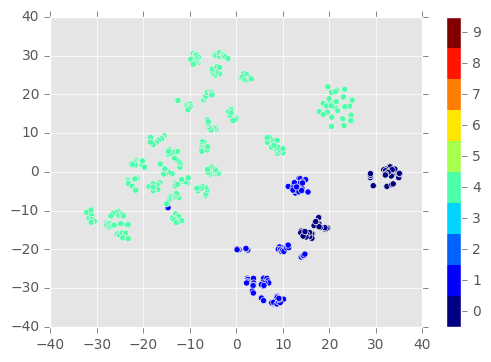

In [51]:
plot_tsne(features_update, labels_update, images_update, perplexity=20, interactive=False)

In [41]:
features_cradle = features_all[(labels_all != '7') & (labels_all != '4')]

In [42]:
labels_cradle = labels_all[(labels_all != '7') & (labels_all != '4')]

In [43]:
sns_cradle = sns_all[(labels_all != '7') & (labels_all != '4')]

In [44]:
images_cradle = images_all[(labels_all != '7') & (labels_all != '4')]

In [45]:
train_svm_classifier(features_cradle, labels_cradle, sns_cradle, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.970588, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.970588, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.0s
[CV] kernel=linear, C=100 ....................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............. kernel=linear, C=100, score=0.970588, total=   0.0s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.0s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.970588, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=1.000000, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=1.000000, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.558824, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

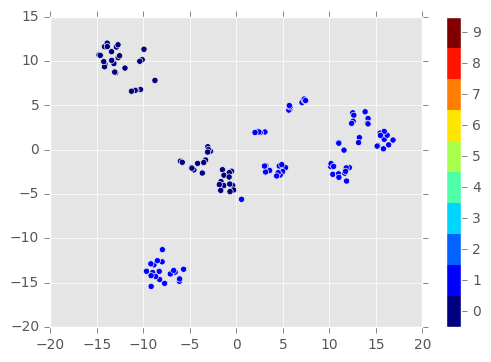

In [50]:
plot_tsne(features_cradle, labels_cradle, images_cradle, perplexity=20, interactive=False)